<h1><center>e-Sports Data Analysis</center></h1>

![Cat](esport.jfif)

imports : (i hate shorthands especially on my educational notebooks) 

In [2]:
import pandas
import numpy
import matplotlib
import seaborn

#pandas.set_option('display.max_columns',100) #no need to do this. our dataset has only a few columns

Data Set : eSports Earnings(kaggle) by JACK DAOUD

https://www.kaggle.com/datasets/jackdaoud/esports-earnings-for-players-teams-by-game


In [3]:
teams = pandas.read_csv('highest_earning_teams.csv')
players = pandas.read_csv('highest_earning_players.csv')
codes = pandas.read_csv('country-and-continent-codes-list.csv')

Now let's have a closer look to these 3 dataframes , starting with the teams

In [4]:
teams

,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre
0,760,San Francisco Shock,3105000.0,7,Overwatch,First-Person Shooter
1,776,London Spitfire,1591136.5,13,Overwatch,First-Person Shooter
2,768,New York Excelsior,1572618.5,18,Overwatch,First-Person Shooter
3,773,Philadelphia Fusion,1186278.5,15,Overwatch,First-Person Shooter
4,766,Seoul Dynasty,1130000.0,6,Overwatch,First-Person Shooter
...,...,...,...,...,...,...
923,24781,Rex Regum Qeon,6286.8,2,Arena of Valor,Multiplayer Online Battle Arena
924,261,Alliance,4000.0,1,Arena of Valor,Multiplayer Online Battle Arena
925,713,Marines Esports,3429.6,1,Arena of Valor,Multiplayer Online Battle Arena
926,608,British National Team,2500.0,1,Arena of Valor,Multiplayer Online Battle Arena


Teams Dataframe has 6 columns. The name  and the ID of each team , the total amount of money the have earned , the number of the tournaments they have participated in (and won a prize) the game they play and the game genre. 

In [5]:
teams.info

<bound method DataFrame.info of      TeamId               TeamName  TotalUSDPrize  TotalTournaments  \
0       760    San Francisco Shock      3105000.0                 7   
1       776        London Spitfire      1591136.5                13   
2       768     New York Excelsior      1572618.5                18   
3       773    Philadelphia Fusion      1186278.5                15   
4       766          Seoul Dynasty      1130000.0                 6   
..      ...                    ...            ...               ...   
923   24781         Rex Regum Qeon         6286.8                 2   
924     261               Alliance         4000.0                 1   
925     713        Marines Esports         3429.6                 1   
926     608  British National Team         2500.0                 1   
927     584  Swedish National Team         2500.0                 1   

               Game                            Genre  
0         Overwatch             First-Person Shooter  
1    

In [6]:
teams['TeamName'].nunique()

505

In [7]:
teams['TeamName'].value_counts()

Team Liquid              9
MVP                      8
Cloud9                   8
Team Dignitas            7
Fnatic                   7
                        ..
LMQ                      1
ESC Ever                 1
Kuala Lumpur Hunters     1
Maximum Impact Gaming    1
MEGA Esports             1
Name: TeamName, Length: 505, dtype: int64

In [8]:
teams[teams['TeamName']=='MVP']

,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre
49,132,MVP,72944.42,15,Overwatch,First-Person Shooter
108,132,MVP,717672.07,331,Starcraft II,Strategy
248,132,MVP,278053.20,27,League of Legends,Multiplayer Online Battle Arena
448,132,MVP,381670.12,40,Counter-Strike: Global Offensive,First-Person Shooter
518,132,MVP,3035123.95,40,Dota 2,Multiplayer Online Battle Arena
691,132,MVP,25081.00,6,PUBG,Battle Royale
800,132,MVP,1656839.93,24,Hearthstone,Collectible Card Game
905,132,MVP,41363.97,2,Arena of Valor,Multiplayer Online Battle Arena


As we can see the Teams dataframe has 928 rows but only 505 unique teams. Thats because many teams participate in tournaments in more than one game. For example MVP team has players who perform on 8 diffirent games! And thats why this team appears 8 times on our list.

In [9]:
teams.sort_values('TotalUSDPrize',ascending=False).head()

,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre
500,419,OG,33810636.13,68,Dota 2,Multiplayer Online Battle Arena
501,102,Team Liquid,22967431.10,96,Dota 2,Multiplayer Online Battle Arena
502,101,Evil Geniuses,19988670.62,115,Dota 2,Multiplayer Online Battle Arena
503,210,Newbee,13523736.43,98,Dota 2,Multiplayer Online Battle Arena
504,211,Team Secret,11492345.09,79,Dota 2,Multiplayer Online Battle Arena


<AxesSubplot: xlabel='TeamName', ylabel='TotalUSDPrize'>

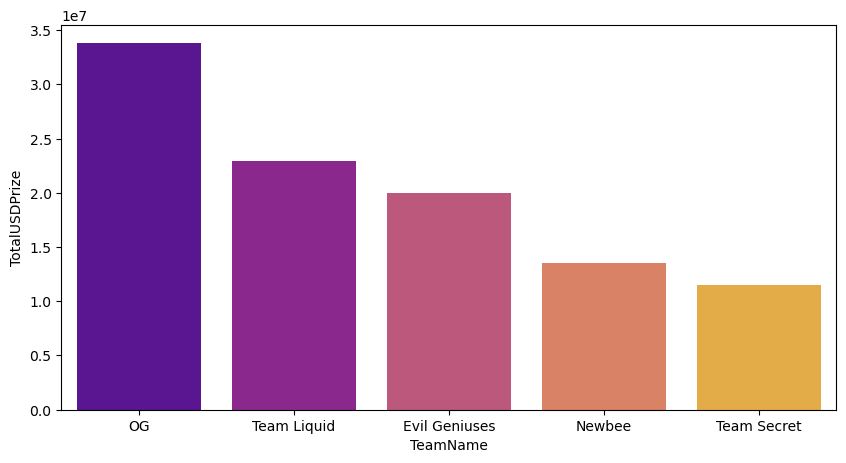

In [10]:
matplotlib.pyplot.figure(figsize=(10,5))
seaborn.barplot(x ='TeamName', y ='TotalUSDPrize', 
                data =teams.sort_values('TotalUSDPrize',ascending=False).head(),palette ='plasma')

In [11]:
teams.sort_values('TotalTournaments',ascending=False).head()

,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre
101,102,Team Liquid,1498925.04,808,Starcraft II,Strategy
112,153,ROOT Gaming,627435.83,610,Starcraft II,Strategy
122,395,PSISTORM Gaming,419733.17,488,Starcraft II,Strategy
114,109,Team Acer,587934.65,466,Starcraft II,Strategy
115,111,mousesports,542901.82,422,Starcraft II,Strategy


<AxesSubplot: xlabel='TeamName', ylabel='TotalTournaments'>

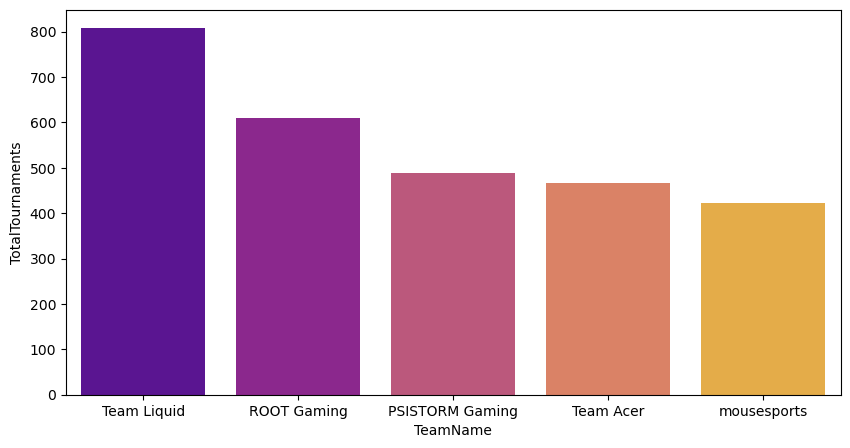

In [12]:
aa=teams.sort_values('TotalTournaments',ascending=False).head()
matplotlib.pyplot.figure(figsize=(10,5))
seaborn.barplot(x ='TeamName', y ='TotalTournaments', 
                data =aa,palette ='plasma')
#matplotlib.pyplot.tight_layout()

It is easy to observe that Dota is the most well paid game by far. The first 5 teams in earnigs are playing Dota 2 . And the need around 80 tournaments to earn these money. On the other hand if you play Starcraft you need 10 times more tournaments to earn less than 10%percent of 'Dota money'. Lets make a new column that shows 

In [13]:
teams['Game'].value_counts()

Overwatch                           100
Starcraft II                        100
League of Legends                   100
Fortnite                            100
Counter-Strike: Global Offensive    100
Dota 2                              100
PUBG                                100
Heroes of the Storm                 100
Hearthstone                          80
Arena of Valor                       48
Name: Game, dtype: int64

There are 10 games that are played in tournaments and in the list above we can see how many teams play each game

In [14]:
teams['Genre'].value_counts()

Multiplayer Online Battle Arena    348
First-Person Shooter               200
Battle Royale                      200
Strategy                           100
Collectible Card Game               80
Name: Genre, dtype: int64

In [15]:
teams[['Game','Genre']].groupby('Game')['Genre'].value_counts()
#all together in a more beautiful form!

Game                              Genre                          
Arena of Valor                    Multiplayer Online Battle Arena     48
Counter-Strike: Global Offensive  First-Person Shooter               100
Dota 2                            Multiplayer Online Battle Arena    100
Fortnite                          Battle Royale                      100
Hearthstone                       Collectible Card Game               80
Heroes of the Storm               Multiplayer Online Battle Arena    100
League of Legends                 Multiplayer Online Battle Arena    100
Overwatch                         First-Person Shooter               100
PUBG                              Battle Royale                      100
Starcraft II                      Strategy                           100
Name: Genre, dtype: int64

In [16]:
teams


,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre
0,760,San Francisco Shock,3105000.0,7,Overwatch,First-Person Shooter
1,776,London Spitfire,1591136.5,13,Overwatch,First-Person Shooter
2,768,New York Excelsior,1572618.5,18,Overwatch,First-Person Shooter
3,773,Philadelphia Fusion,1186278.5,15,Overwatch,First-Person Shooter
4,766,Seoul Dynasty,1130000.0,6,Overwatch,First-Person Shooter
...,...,...,...,...,...,...
923,24781,Rex Regum Qeon,6286.8,2,Arena of Valor,Multiplayer Online Battle Arena
924,261,Alliance,4000.0,1,Arena of Valor,Multiplayer Online Battle Arena
925,713,Marines Esports,3429.6,1,Arena of Valor,Multiplayer Online Battle Arena
926,608,British National Team,2500.0,1,Arena of Valor,Multiplayer Online Battle Arena


In [17]:
teams.groupby('TeamName')['TotalUSDPrize'].sum().sort_values(ascending=False)
#in addition to the previous top rewarded teams this is the sum of the earnings for every game the team participates in.

TeamName
OG               34297886.13
Team Liquid      33095692.87
Evil Geniuses    21662171.52
Virtus.pro       14393878.63
Newbee           14072159.40
                    ...     
War Legend           2128.81
vsBANDITS            2000.00
Wind and Rain        1217.78
Rams                 1200.00
ePunks                800.00
Name: TotalUSDPrize, Length: 505, dtype: float64

<AxesSubplot: xlabel='TeamName'>

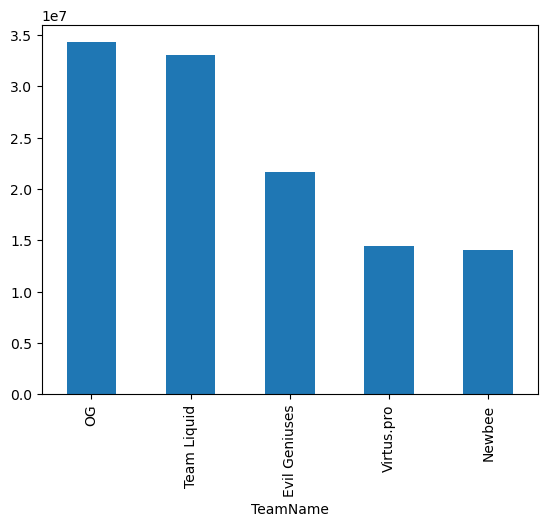

In [18]:
teams.groupby('TeamName')['TotalUSDPrize'].sum().sort_values(ascending=False).head().plot(kind='bar')
#there is one team that was not in the previous plot . It seems that virtus.pro is not in the dota elite but overall it goes pretty well!

In [19]:
teams

,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre
0,760,San Francisco Shock,3105000.0,7,Overwatch,First-Person Shooter
1,776,London Spitfire,1591136.5,13,Overwatch,First-Person Shooter
2,768,New York Excelsior,1572618.5,18,Overwatch,First-Person Shooter
3,773,Philadelphia Fusion,1186278.5,15,Overwatch,First-Person Shooter
4,766,Seoul Dynasty,1130000.0,6,Overwatch,First-Person Shooter
...,...,...,...,...,...,...
923,24781,Rex Regum Qeon,6286.8,2,Arena of Valor,Multiplayer Online Battle Arena
924,261,Alliance,4000.0,1,Arena of Valor,Multiplayer Online Battle Arena
925,713,Marines Esports,3429.6,1,Arena of Valor,Multiplayer Online Battle Arena
926,608,British National Team,2500.0,1,Arena of Valor,Multiplayer Online Battle Arena


Teams with me most participations in tournaments:

In [20]:
teams.groupby('TeamName')['TotalTournaments'].sum().sort_values(ascending=False).head(7)

TeamName
Team Liquid        1296
mousesports         690
ROOT Gaming         628
Fnatic              591
Cloud9              504
Invictus Gaming     493
PSISTORM Gaming     488
Name: TotalTournaments, dtype: int64

<AxesSubplot: xlabel='TeamName'>

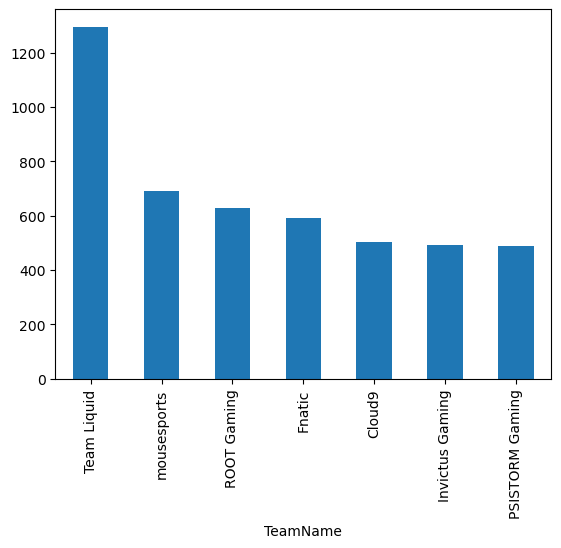

In [21]:
teams.groupby('TeamName')['TotalTournaments'].sum().sort_values(ascending=False).head(7).plot(kind='bar')

We could also filter the tournament , to see for example which are the teams that participate
more often at a PUBG tournament : 

<AxesSubplot: xlabel='TeamName'>

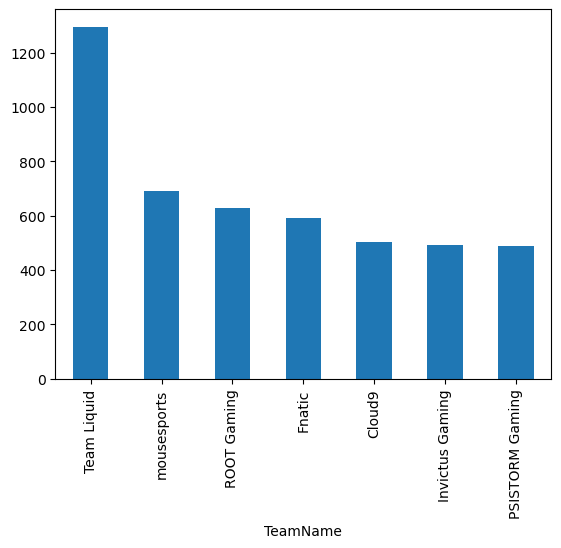

In [22]:
teams.groupby('TeamName')['TotalTournaments'].sum().sort_values(ascending=False).head(7).plot(kind='bar')

<AxesSubplot: title={'center': 'Teams with most appearances in PUBG tournaments'}, xlabel='TeamName'>

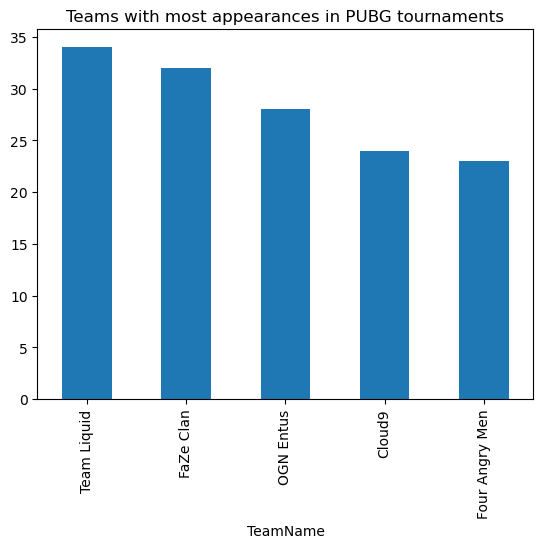

In [23]:
teams.query('Game=="PUBG"').groupby('TeamName')['TotalTournaments'].sum().sort_values(ascending=False)\
.head().plot(kind='bar',title='Teams with most appearances in PUBG tournaments')

In [24]:
teams.groupby('Game').sum().sort_values(by='TotalTournaments',ascending=False).head()

,TeamId,TotalUSDPrize,TotalTournaments
Game,,,
Starcraft II,130807,2.785615e+07,12676
Counter-Strike: Global Offensive,335784,8.485393e+07,5996
Dota 2,383304,2.202828e+08,2931
League of Legends,184437,6.466556e+07,2515
Heroes of the Storm,217853,1.071052e+07,1663


In [25]:
teams.groupby('Game').sum().sort_values(by='TotalUSDPrize',ascending=False).head()

,TeamId,TotalUSDPrize,TotalTournaments
Game,,,
Dota 2,383304,2.202828e+08,2931
Counter-Strike: Global Offensive,335784,8.485393e+07,5996
League of Legends,184437,6.466556e+07,2515
Fortnite,926650,3.466133e+07,1229
Starcraft II,130807,2.785615e+07,12676


Heroes of the Storm is more popular in tournaments but Fortnite is better paid even though
this game has hosted 400 tournaments less than Hots.

In [26]:
gt = teams.groupby('Game').sum().sort_values(by='TotalTournaments',ascending=False).head()
gp = teams.groupby('Game').sum().sort_values(by='TotalUSDPrize',ascending=False).head()

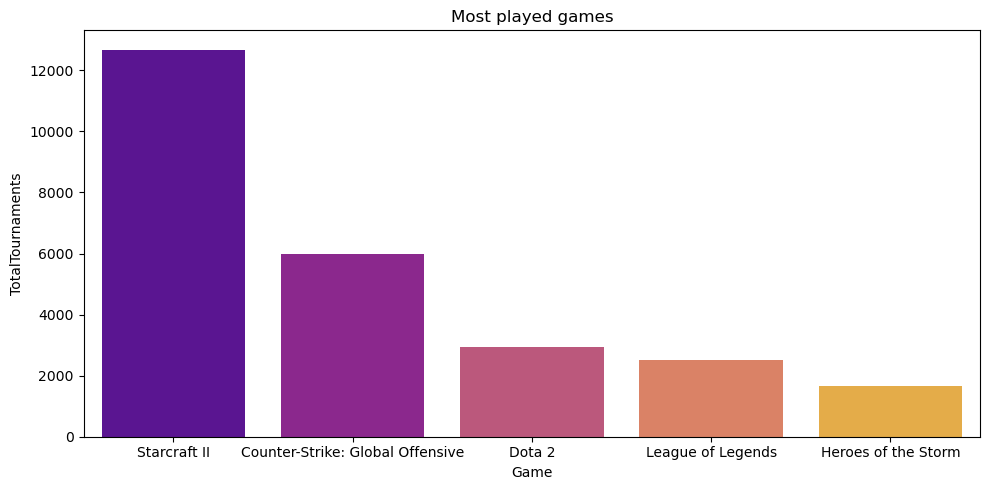

In [27]:
matplotlib.pyplot.figure(figsize=(10,5))
seaborn.barplot(x =gt.index, y ='TotalTournaments', 
                data =gt,palette ='plasma')
matplotlib.pyplot.title('Most played games')
matplotlib.pyplot.tight_layout()

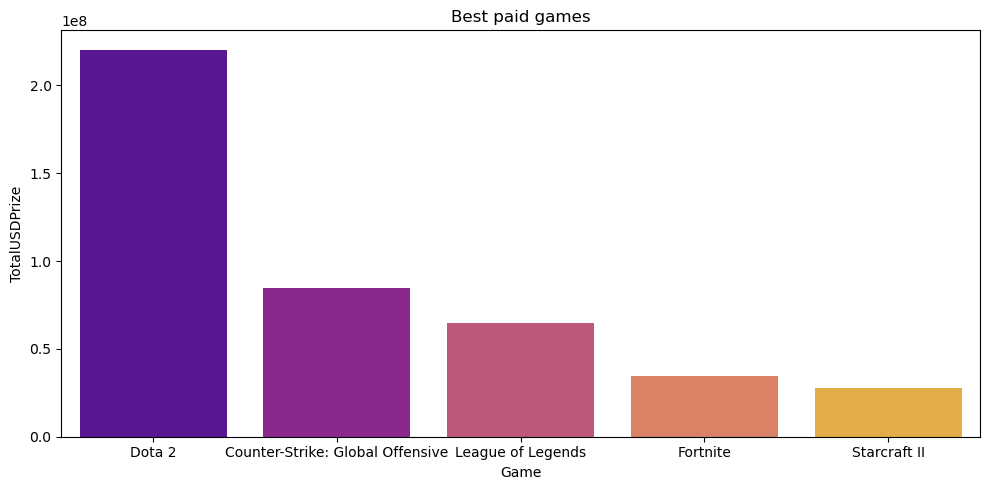

In [28]:
aa=teams.sort_values('TotalTournaments',ascending=False).head()
matplotlib.pyplot.figure(figsize=(10,5))
seaborn.barplot(x =gp.index, y ='TotalUSDPrize', 
                data =gp,palette ='plasma')
matplotlib.pyplot.title('Best paid games')
matplotlib.pyplot.tight_layout()

Now lets have a look at the players :

In [29]:
players

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre
0,3883,Peter,Rasmussen,dupreeh,dk,1822989.41,Counter-Strike: Global Offensive,First-Person Shooter
1,3679,Andreas,Højsleth,Xyp9x,dk,1799288.57,Counter-Strike: Global Offensive,First-Person Shooter
2,3885,Nicolai,Reedtz,dev1ce,dk,1787489.88,Counter-Strike: Global Offensive,First-Person Shooter
3,3672,Lukas,Rossander,gla1ve,dk,1652350.75,Counter-Strike: Global Offensive,First-Person Shooter
4,17800,Emil,Reif,Magisk,dk,1416448.64,Counter-Strike: Global Offensive,First-Person Shooter
...,...,...,...,...,...,...,...,...
995,7400,Janne,Mikkonen,Savjz,fi,50734.44,Hearthstone,Collectible Card Game
996,3255,Drew,Biessener,Tidesoftime,us,50449.60,Hearthstone,Collectible Card Game
997,49164,Simone,Liguori,Leta,it,49300.00,Hearthstone,Collectible Card Game
998,43043,Mike,Eichner,Ike,us,48550.00,Hearthstone,Collectible Card Game


This dataset includes players id , name, surname , nickname , origin country code , the game he plays and its genre and of course his total earnings

In [30]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PlayerId       1000 non-null   int64  
 1   NameFirst      1000 non-null   object 
 2   NameLast       1000 non-null   object 
 3   CurrentHandle  1000 non-null   object 
 4   CountryCode    1000 non-null   object 
 5   TotalUSDPrize  1000 non-null   float64
 6   Game           1000 non-null   object 
 7   Genre          1000 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


In [31]:
players['PlayerId'].nunique()

998

In [32]:
ab=players[players['PlayerId'].duplicated()==True]
#we have 2 players with the same id name etc , but its not a mistake , its the same player who participates in two different games:

In [33]:
ab

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre
634,1233,Dennis,Schneider,HasuObs,de,110050.76,Heroes of the Storm,Multiplayer Online Battle Arena
658,25047,Harrison,Chang,psalm,us,80661.20,Heroes of the Storm,Multiplayer Online Battle Arena


In [34]:
players.query('PlayerId==1233')

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre
595,1233,Dennis,Schneider,HasuObs,de,84794.99,Starcraft II,Strategy
634,1233,Dennis,Schneider,HasuObs,de,110050.76,Heroes of the Storm,Multiplayer Online Battle Arena


In [35]:
players.sort_values('TotalUSDPrize',ascending=False).head(10)
#top 10 paid are all Dota players which makes sense since dota is tha best paid game as we've already seen.

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre
100,3304,Johan,Sundstein,N0tail,dk,6952596.58,Dota 2,Multiplayer Online Battle Arena
101,3822,Jesse,Vainikka,JerAx,fi,6470000.02,Dota 2,Multiplayer Online Battle Arena
102,30451,Anathan,Pham,ana,au,6000411.96,Dota 2,Multiplayer Online Battle Arena
103,2811,Sébastien,Debs,Ceb,fr,5554297.41,Dota 2,Multiplayer Online Battle Arena
104,18897,Topias,Taavitsainen,Topson,fi,5470902.57,Dota 2,Multiplayer Online Battle Arena
105,3145,Kuro,Takhasomi,KuroKy,de,5193382.81,Dota 2,Multiplayer Online Battle Arena
106,14671,Amer,Al-Barkawi,Miracle-,jo,4798043.68,Dota 2,Multiplayer Online Battle Arena
107,12579,Ivan,Ivanov,MinD_ContRoL,bg,4579118.16,Dota 2,Multiplayer Online Battle Arena
108,25335,Maroun,Merhej,GH,lb,4193412.69,Dota 2,Multiplayer Online Battle Arena
109,12133,Lasse,Urpalainen,Matumbaman,fi,3765369.04,Dota 2,Multiplayer Online Battle Arena


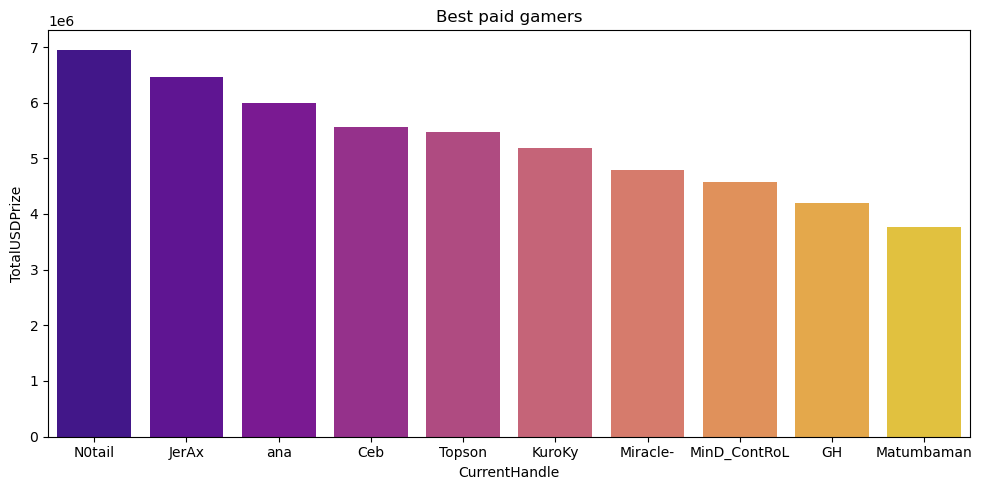

In [36]:
pp=players.sort_values('TotalUSDPrize',ascending=False).head(10)
matplotlib.pyplot.figure(figsize=(10,5))
seaborn.barplot(x ='CurrentHandle', y ='TotalUSDPrize', 
                data =pp,palette ='plasma')
matplotlib.pyplot.title('Best paid gamers')
matplotlib.pyplot.tight_layout()

In [37]:
players.groupby('Game').count()
#The dataset has informations for the top100 players of each of those games !

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Genre
Game,,,,,,,
Arena of Valor,100,100,100,100,100,100,100
Counter-Strike: Global Offensive,100,100,100,100,100,100,100
Dota 2,100,100,100,100,100,100,100
Fortnite,100,100,100,100,100,100,100
Hearthstone,100,100,100,100,100,100,100
Heroes of the Storm,100,100,100,100,100,100,100
League of Legends,100,100,100,100,100,100,100
Overwatch,100,100,100,100,100,100,100
PUBG,100,100,100,100,100,100,100


In [38]:
players['Game'].value_counts() #similar to the upper one

Counter-Strike: Global Offensive    100
Dota 2                              100
League of Legends                   100
Fortnite                            100
Overwatch                           100
Starcraft II                        100
Heroes of the Storm                 100
PUBG                                100
Arena of Valor                      100
Hearthstone                         100
Name: Game, dtype: int64

In [39]:
players[['Game','Genre']].value_counts() #even better

Game                              Genre                          
Arena of Valor                    Multiplayer Online Battle Arena    100
Counter-Strike: Global Offensive  First-Person Shooter               100
Dota 2                            Multiplayer Online Battle Arena    100
Fortnite                          Battle Royale                      100
Hearthstone                       Collectible Card Game              100
Heroes of the Storm               Multiplayer Online Battle Arena    100
League of Legends                 Multiplayer Online Battle Arena    100
Overwatch                         First-Person Shooter               100
PUBG                              Battle Royale                      100
Starcraft II                      Strategy                           100
dtype: int64

In [40]:
players['Genre'].value_counts()

Multiplayer Online Battle Arena    400
First-Person Shooter               200
Battle Royale                      200
Strategy                           100
Collectible Card Game              100
Name: Genre, dtype: int64

In [41]:
players['CountryCode'].value_counts().head(5)
#the most gamers are from Sount Korea and then follows:
#chine , usa , sweden and canada 
#this formating with only two letters of the country is quiet difficult to read so lets change it

kr    251
cn    168
us    114
se     45
ca     37
Name: CountryCode, dtype: int64

Let's have a loot at codes dataframe first

In [42]:
codes

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4.0
1,Europe,EU,"Albania, Republic of",AL,ALB,8.0
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10.0
3,Africa,AF,"Algeria, People's Democratic Republic of",DZ,DZA,12.0
4,Oceania,OC,American Samoa,AS,ASM,16.0
...,...,...,...,...,...,...
257,Africa,AF,"Zambia, Republic of",ZM,ZMB,894.0
258,Oceania,OC,Disputed Territory,XX,NaN,NaN
259,Asia,AS,Iraq-Saudi Arabia Neutral Zone,XE,NaN,NaN
260,Asia,AS,United Nations Neutral Zone,XD,NaN,NaN


Two_Letter_Country_Code is the same column as CountryCode in the players dataframe 

In [43]:
players['CountryCode']=players['CountryCode'].str.upper()

In [44]:
codesForPlayers=codes[['Two_Letter_Country_Code','Country_Name']]

In [45]:
codesForPlayers=codesForPlayers.rename(columns = {'Two_Letter_Country_Code':'CountryCode'})

In [46]:
codesForPlayers

,CountryCode,Country_Name
0,AF,"Afghanistan, Islamic Republic of"
1,AL,"Albania, Republic of"
2,AQ,Antarctica (the territory South of 60 deg S)
3,DZ,"Algeria, People's Democratic Republic of"
4,AS,American Samoa
...,...,...
257,ZM,"Zambia, Republic of"
258,XX,Disputed Territory
259,XE,Iraq-Saudi Arabia Neutral Zone
260,XD,United Nations Neutral Zone


Now we have the same column in both datasets so we can merge them!

In [47]:
playersX = players.merge(codesForPlayers,how='left',on='CountryCode',)
#it doesnt really matters if its a left or inner(by default) merge because we now that 
#the 2 letter code is list is complete

In [48]:
playersX

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre,Country_Name
0,3883,Peter,Rasmussen,dupreeh,DK,1822989.41,Counter-Strike: Global Offensive,First-Person Shooter,"Denmark, Kingdom of"
1,3679,Andreas,Højsleth,Xyp9x,DK,1799288.57,Counter-Strike: Global Offensive,First-Person Shooter,"Denmark, Kingdom of"
2,3885,Nicolai,Reedtz,dev1ce,DK,1787489.88,Counter-Strike: Global Offensive,First-Person Shooter,"Denmark, Kingdom of"
3,3672,Lukas,Rossander,gla1ve,DK,1652350.75,Counter-Strike: Global Offensive,First-Person Shooter,"Denmark, Kingdom of"
4,17800,Emil,Reif,Magisk,DK,1416448.64,Counter-Strike: Global Offensive,First-Person Shooter,"Denmark, Kingdom of"
...,...,...,...,...,...,...,...,...,...
1027,7400,Janne,Mikkonen,Savjz,FI,50734.44,Hearthstone,Collectible Card Game,"Finland, Republic of"
1028,3255,Drew,Biessener,Tidesoftime,US,50449.60,Hearthstone,Collectible Card Game,United States of America
1029,49164,Simone,Liguori,Leta,IT,49300.00,Hearthstone,Collectible Card Game,"Italy, Italian Republic"
1030,43043,Mike,Eichner,Ike,US,48550.00,Hearthstone,Collectible Card Game,United States of America


In our players dataframe we had 1000 rows but now we have 1032
That is because some codes in the code dataframe is duplicated :

In [49]:
dupli = playersX[playersX['PlayerId'].duplicated()]
#we have 34 duplicates(32 from the merging +2 already existed)

In [50]:
dupli.shape

(34, 9)

In [51]:
dupli

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre,Country_Name
26,8168,Egor,Vasilyev,flamie,RU,732920.07,Counter-Strike: Global Offensive,First-Person Shooter,Russian Federation
42,16267,Denis,Sharipov,electroNic,RU,531541.99,Counter-Strike: Global Offensive,First-Person Shooter,Russian Federation
56,3676,Dauren,Kystaubayev,AdreN,KZ,414305.65,Counter-Strike: Global Offensive,First-Person Shooter,"Kazakhstan, Republic of"
68,4587,Denis,Kostin,seized,RU,339091.34,Counter-Strike: Global Offensive,First-Person Shooter,Russian Federation
76,1494,Mikhail,Stolyarov,Dosia,RU,307601.25,Counter-Strike: Global Offensive,First-Person Shooter,Russian Federation
78,13134,Can,Dörtkardes,XANTARES,TR,307129.97,Counter-Strike: Global Offensive,First-Person Shooter,"Turkey, Republic of"
82,19595,Özgür,Eker,woxic,TR,302884.33,Counter-Strike: Global Offensive,First-Person Shooter,"Turkey, Republic of"
86,39608,Alexey,Golubev,Qikert,KZ,275404.13,Counter-Strike: Global Offensive,First-Person Shooter,"Kazakhstan, Republic of"
88,10191,Rustem,Tlepov,mou,KZ,273859.49,Counter-Strike: Global Offensive,First-Person Shooter,"Kazakhstan, Republic of"
90,35378,Timur,Tulepov,Buster,KZ,273784.13,Counter-Strike: Global Offensive,First-Person Shooter,"Kazakhstan, Republic of"


In [52]:
codes.query('Two_Letter_Country_Code=="RU"')

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
191,Europe,EU,Russian Federation,RU,RUS,643.0
192,Asia,AS,Russian Federation,RU,RUS,643.0


In [53]:
codes.query('Two_Letter_Country_Code=="KZ"')

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
116,Europe,EU,"Kazakhstan, Republic of",KZ,KAZ,398.0
117,Asia,AS,"Kazakhstan, Republic of",KZ,KAZ,398.0


To prevent this from happening we could drop the duplicates before merging :

In [54]:
codesForPlayers=codesForPlayers.drop_duplicates(['CountryCode'])

In [55]:
playersY = players.merge(codesForPlayers,how='left',on='CountryCode')

In [56]:
playersY

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre,Country_Name
0,3883,Peter,Rasmussen,dupreeh,DK,1822989.41,Counter-Strike: Global Offensive,First-Person Shooter,"Denmark, Kingdom of"
1,3679,Andreas,Højsleth,Xyp9x,DK,1799288.57,Counter-Strike: Global Offensive,First-Person Shooter,"Denmark, Kingdom of"
2,3885,Nicolai,Reedtz,dev1ce,DK,1787489.88,Counter-Strike: Global Offensive,First-Person Shooter,"Denmark, Kingdom of"
3,3672,Lukas,Rossander,gla1ve,DK,1652350.75,Counter-Strike: Global Offensive,First-Person Shooter,"Denmark, Kingdom of"
4,17800,Emil,Reif,Magisk,DK,1416448.64,Counter-Strike: Global Offensive,First-Person Shooter,"Denmark, Kingdom of"
...,...,...,...,...,...,...,...,...,...
995,7400,Janne,Mikkonen,Savjz,FI,50734.44,Hearthstone,Collectible Card Game,"Finland, Republic of"
996,3255,Drew,Biessener,Tidesoftime,US,50449.60,Hearthstone,Collectible Card Game,United States of America
997,49164,Simone,Liguori,Leta,IT,49300.00,Hearthstone,Collectible Card Game,"Italy, Italian Republic"
998,43043,Mike,Eichner,Ike,US,48550.00,Hearthstone,Collectible Card Game,United States of America


In [57]:
#just to proove what i said before about inner and left.
playersZ = players.merge(codesForPlayers,how='inner',on='CountryCode')

In [58]:
playersZ

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre,Country_Name
0,3883,Peter,Rasmussen,dupreeh,DK,1822989.41,Counter-Strike: Global Offensive,First-Person Shooter,"Denmark, Kingdom of"
1,3679,Andreas,Højsleth,Xyp9x,DK,1799288.57,Counter-Strike: Global Offensive,First-Person Shooter,"Denmark, Kingdom of"
2,3885,Nicolai,Reedtz,dev1ce,DK,1787489.88,Counter-Strike: Global Offensive,First-Person Shooter,"Denmark, Kingdom of"
3,3672,Lukas,Rossander,gla1ve,DK,1652350.75,Counter-Strike: Global Offensive,First-Person Shooter,"Denmark, Kingdom of"
4,17800,Emil,Reif,Magisk,DK,1416448.64,Counter-Strike: Global Offensive,First-Person Shooter,"Denmark, Kingdom of"
...,...,...,...,...,...,...,...,...,...
995,75020,Aum,Chatchanapong,Happy,TH,40376.87,Arena of Valor,Multiplayer Online Battle Arena,"Thailand, Kingdom of"
996,54450,Chanapol,Siri,Sky,TH,28083.35,Arena of Valor,Multiplayer Online Battle Arena,"Thailand, Kingdom of"
997,21212,Chattrakarn,Parichatkun,Erl2oR,TH,27074.40,Arena of Valor,Multiplayer Online Battle Arena,"Thailand, Kingdom of"
998,12241,Komklit,Wongsawat,O7T-V1,TH,25941.03,Arena of Valor,Multiplayer Online Battle Arena,"Thailand, Kingdom of"


In [59]:
playersY['Country_Name'].value_counts()

Korea, Republic of                                    251
China, People's Republic of                           168
United States of America                              114
Sweden, Kingdom of                                     45
Canada                                                 37
France, French Republic                                37
Denmark, Kingdom of                                    36
Taiwan                                                 34
Germany, Federal Republic of                           30
Thailand, Kingdom of                                   29
Russian Federation                                     22
United Kingdom of Great Britain & Northern Ireland     16
Finland, Republic of                                   16
Poland, Republic of                                    14
Ukraine                                                12
Norway, Kingdom of                                     10
Brazil, Federative Republic of                         10
Netherlands, K

Yeah , thats much better than the two letters coding

# BONUS BONUS BONUS BONUS

Despite the fact that our dataset is pretty small in memory i will show you some efficient ways to make it even small
and your code even faster! ! !

We will make some data transformations to ourdataframes starting with 'Teams' to make our code faster :

In [60]:
teams

,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre
0,760,San Francisco Shock,3105000.0,7,Overwatch,First-Person Shooter
1,776,London Spitfire,1591136.5,13,Overwatch,First-Person Shooter
2,768,New York Excelsior,1572618.5,18,Overwatch,First-Person Shooter
3,773,Philadelphia Fusion,1186278.5,15,Overwatch,First-Person Shooter
4,766,Seoul Dynasty,1130000.0,6,Overwatch,First-Person Shooter
...,...,...,...,...,...,...
923,24781,Rex Regum Qeon,6286.8,2,Arena of Valor,Multiplayer Online Battle Arena
924,261,Alliance,4000.0,1,Arena of Valor,Multiplayer Online Battle Arena
925,713,Marines Esports,3429.6,1,Arena of Valor,Multiplayer Online Battle Arena
926,608,British National Team,2500.0,1,Arena of Valor,Multiplayer Online Battle Arena


In [61]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TeamId            928 non-null    int64  
 1   TeamName          928 non-null    object 
 2   TotalUSDPrize     928 non-null    float64
 3   TotalTournaments  928 non-null    int64  
 4   Game              928 non-null    object 
 5   Genre             928 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 43.6+ KB


Our dataframe(teams) is 43.7 KB

In [62]:
teams['TeamId'].value_counts()

102      9
132      8
212      8
117      7
118      7
        ..
373      1
443      1
682      1
389      1
24874    1
Name: TeamId, Length: 505, dtype: int64

Team id is a column with teams ids and its totally unnecessary to be a int-64 type. It could be int-32 or even 
int-16 if we are carefull with the ids given to the teams.

In [63]:
teams['TeamId']=teams['TeamId'].astype('int32')

We could also change the type of our Prizes. Small amount of money like 0.8 dollars wont change anything really
So lets change the type to an int32 like before.

In [64]:
teams['TotalUSDPrize']=teams['TotalUSDPrize'].astype('int32')

Total tournaments , will be int16(int16 can give as a max value of 32767). It is impossible for a team to participate to more than 32.000 tournaments.

In [65]:
teams['TotalTournaments'].value_counts()#first team has less than 100.

1      82
3      68
5      56
2      49
4      42
       ..
422     1
466     1
248     1
147     1
45      1
Name: TotalTournaments, Length: 145, dtype: int64

In [66]:
teams['TotalTournaments']=teams['TotalTournaments'].astype('int16')

In [67]:
teams['Game'].nunique()

10

In [68]:
teams['Genre'].nunique()

5

Our last two columns(genre and games) have only 10 and 5 different values. So we could turn them into 
category type instead of objest(string)

In [69]:
teams['Game']=teams['Game'].astype('category')
teams['Genre']=teams['Genre'].astype('category')

In [70]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   TeamId            928 non-null    int32   
 1   TeamName          928 non-null    object  
 2   TotalUSDPrize     928 non-null    int32   
 3   TotalTournaments  928 non-null    int16   
 4   Game              928 non-null    category
 5   Genre             928 non-null    category
dtypes: category(2), int16(1), int32(2), object(1)
memory usage: 18.8+ KB


From  43.7 ---> 18.8 KB!!  Now is 2.3 times lighter!! 

We can make exactly the same transformations for the players dataset as well! 